In [392]:
from PIL import Image
import torchvision.transforms as T
import numpy as np
import torch.nn.functional as F
import torch
from PIL import Image
from PIL.ImageDraw import Draw

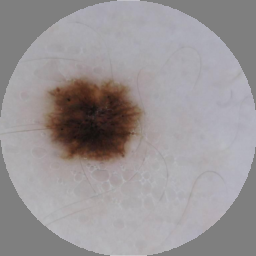

In [400]:
def drop(input):
    def standartize(input):
        return (input - input.min()) / (input.max() - input.min())
    
    _, h, w = input.size()
    
    p = input.mean(0)
    p = standartize(p)
    p = p**2
    p = standartize(p)
    
    p = p.view(1, 1, h, w)
    p = F.upsample(p, scale_factor=1 / 32, mode='bilinear') 
    m = (torch.rand_like(p) > p / 4).float()
    m = F.upsample(m, scale_factor=32, mode='nearest')
    m = m.view(1, h, w)
    
    input *= m
    
    return input

def circle(input):
    mask = Image.new('1', input.size)
    Draw(mask).ellipse(((0, 0), input.size), fill=True)
    fill = Image.new(input.mode, input.size, color=(255 // 2,) * 3)
    return Image.composite(input, fill, mask)
    

t = T.Compose([
    T.Resize(256),
    T.RandomCrop(256),
    circle,
    T.ToTensor(),
#     T.Normalize([0.5], [0.5]),
#     drop,
#     circle,
])

image = Image.open('./mela/sample.jpeg')
image = t(image)
T.ToPILImage()(image)